In [6]:
import AlexEigScattering2 as AES
import os,time, h5py
import numpy as np
import matplotlib.pyplot as plt
from common.baseclasses import ArrayWithAxes as AWA

basedir=os.path.dirname("./")
%matplotlib notebook


In [7]:
def load_eigpairs(eigpair_fname):
    """Normalization by sum always ensures that integration will be like summing, which is
    much simpler than keeping track of dx, dy..."""

    global eigpairs
    eigpairs = dict()

    path=os.path.join(basedir,eigpair_fname)

    with h5py.File(path,'r') as f:
        for key in list(f.keys()):
            eigfunc=np.array(f.get(key))
            eigfunc/=np.sqrt(np.sum(np.abs(eigfunc)**2))
            eigpairs[float(key)] = AWA(eigfunc,\
                                       axes=[np.linspace(0,1,eigfunc.shape[0]),\
                                             np.linspace(0,1,eigfunc.shape[1])])


In [26]:
def TestScatteringBasisChange(q=44,\
                           E=44*np.exp(1j*2*np.pi*5e-2),\
                           N_sample_eigenbasis=100,\
                           N_tip_eigenbasis = 10):

    global Responder,Jmaker,R_alphabeta

    Responder=AES.SampleResponse(eigpairs,E=E,N=N_sample_eigenbasis)
    xs,ys=Responder.xs,Responder.ys
    Jmaker=AES.BesselGenerator(q,xs=xs,ys=ys,\
                               N_tip_eigenbasis=N_tip_eigenbasis)
    
    betaz_alpha = np.diag((2-.1j)*(np.arange(N_tip_eigenbasis)+1))
    #betaz_alpha = np.eye(N_tip_eigenbasis);
    Lambdaz_beta = ((1+np.arange(N_tip_eigenbasis))[::-1])

    Ps=np.zeros((len(xs),len(ys)))
    Rs=np.zeros((len(xs),len(ys)))
    last = 0
    for i,x0 in enumerate(xs):
        for j,y0 in enumerate(ys):
            start = time.time()
            tip_eigenbasis=Jmaker.GetTipEigenbasis(x0,y0)
            R_alphabeta = Responder.GetRAlphaBeta(tip_eigenbasis)
            Ps[i,j] = np.sum(np.linalg.inv(betaz_alpha-R_alphabeta).dot(Lambdaz_beta))
            Rs[i,j] = np.sum(np.diag(R_alphabeta))
            last = AES.Progress(i,len(xs),last)
    
    return {'P':Ps,'R':Rs}



In [9]:
load_eigpairs("UnitSquareMesh_100x100_1000_eigenbasis.h5")

Setting Energy
Use Eigvals Len: 100
Setting Sigma
Setting Kernel
Setting Scattering Matrix
Excitation vector (in basis of J(n), n in [0,3]):
	[0 3 1]


/home/basovlab/anaconda3/envs/fenicsproject/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
/home/basovlab/anaconda3/envs/fenicsproject/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


10% complete...
20% complete...
30% complete...
40% complete...
50% complete...
60% complete...
70% complete...
80% complete...
90% complete...
0.7780015786488851


<IPython.core.display.Javascript object>


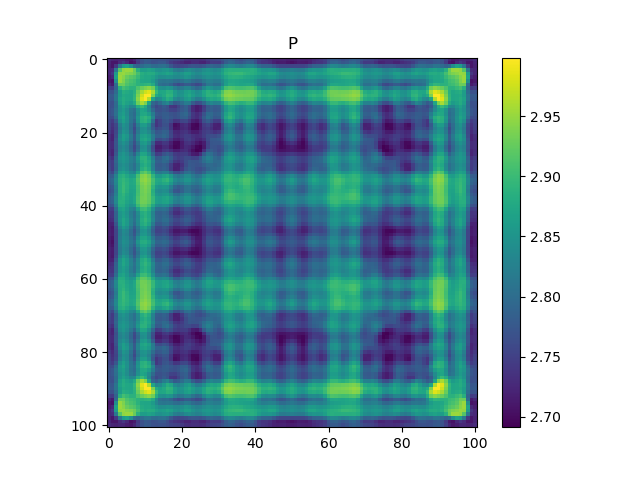

<IPython.core.display.Javascript object>


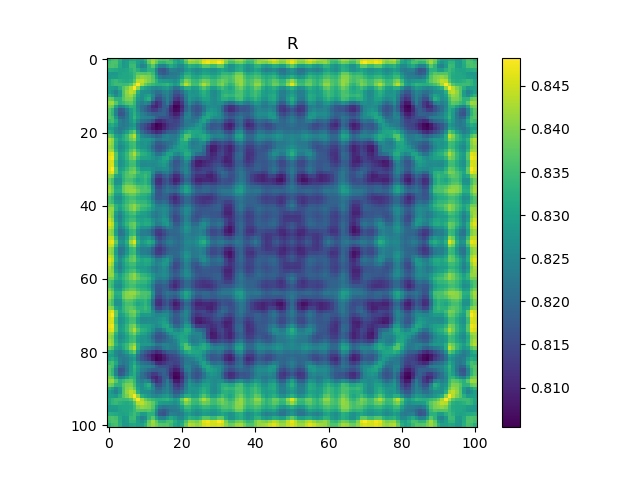

CPU times: user 1min, sys: 17.6 s, total: 1min 17s
Wall time: 46.7 s


In [23]:
%%time
t1=time.time()
d=TestScatteringBasisChange(E=44*np.exp(1j*2*np.pi*5e-2),N_sample_eigenbasis=100,N_tip_eigenbasis=3)
print((time.time()-t1)/60)
plt.figure()
plt.imshow(np.abs(d['P'])); plt.title('P');plt.colorbar()
plt.figure()
plt.imshow(np.abs(d['R'])); plt.title('R');plt.colorbar()

Setting Energy
Use Eigvals Len: 100
Setting Sigma
Setting Kernel
Setting Scattering Matrix
Excitation vector (in basis of J(n), n in [0,10]):
	[3 2 0 3 0 3 3 1 1 2]


/home/basovlab/anaconda3/envs/fenicsproject/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
/home/basovlab/anaconda3/envs/fenicsproject/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


10% complete...
20% complete...
30% complete...
40% complete...
50% complete...
60% complete...
70% complete...
80% complete...
90% complete...
2.3501376787821453


<IPython.core.display.Javascript object>


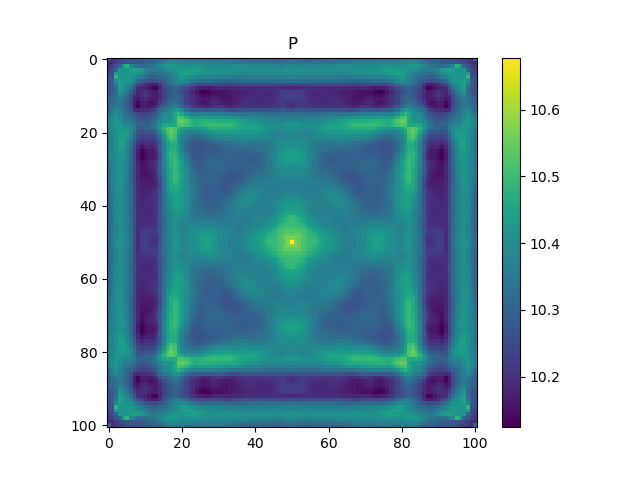

<IPython.core.display.Javascript object>


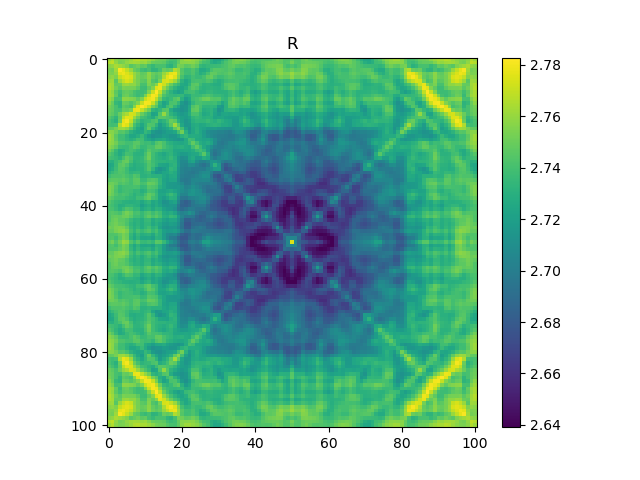

CPU times: user 8min 38s, sys: 7min 6s, total: 15min 44s
Wall time: 2min 21s


In [27]:
%%time
t1=time.time()
d=TestScatteringBasisChange(E=44*np.exp(1j*2*np.pi*5e-2),N_sample_eigenbasis=100,N_tip_eigenbasis=10)
print((time.time()-t1)/60)
plt.figure()
plt.imshow(np.abs(d['P'])); plt.title('P');plt.colorbar()
plt.figure()
plt.imshow(np.abs(d['R'])); plt.title('R');plt.colorbar()

<IPython.core.display.Javascript object>


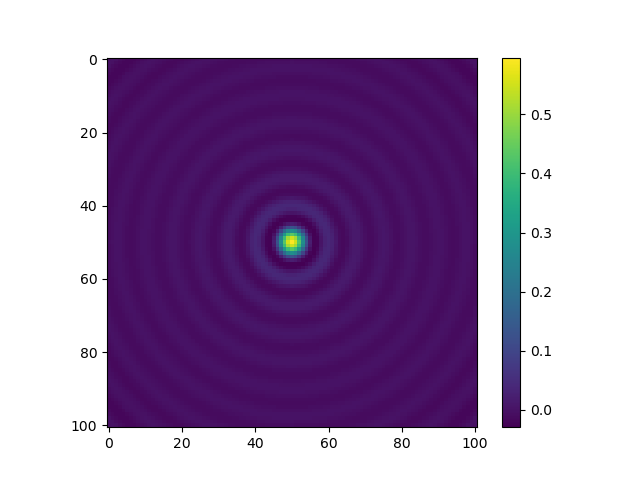

<IPython.core.display.Javascript object>


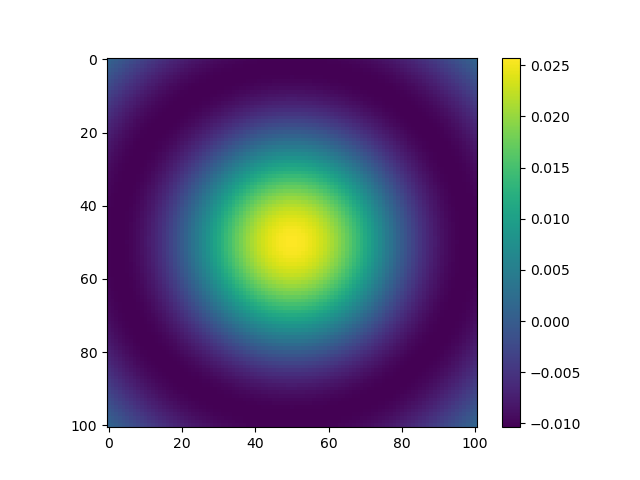

<IPython.core.display.Javascript object>


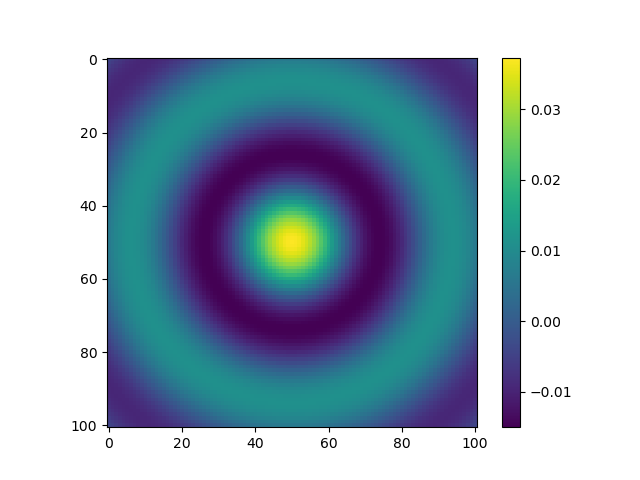

<IPython.core.display.Javascript object>


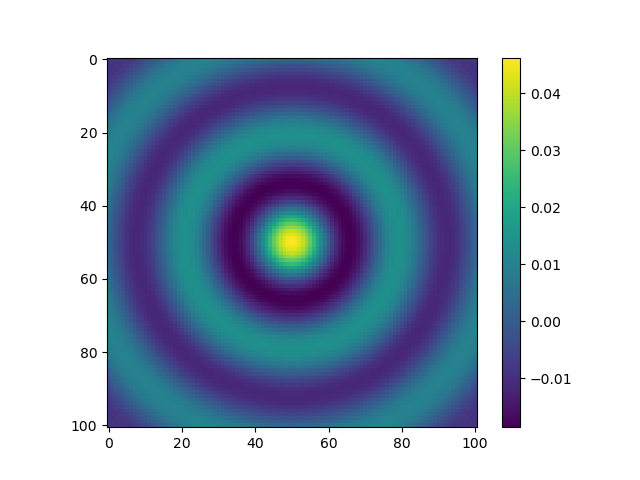

<IPython.core.display.Javascript object>


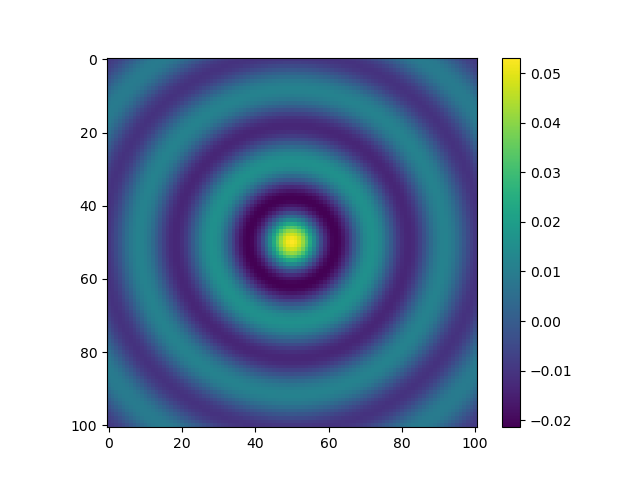

<IPython.core.display.Javascript object>


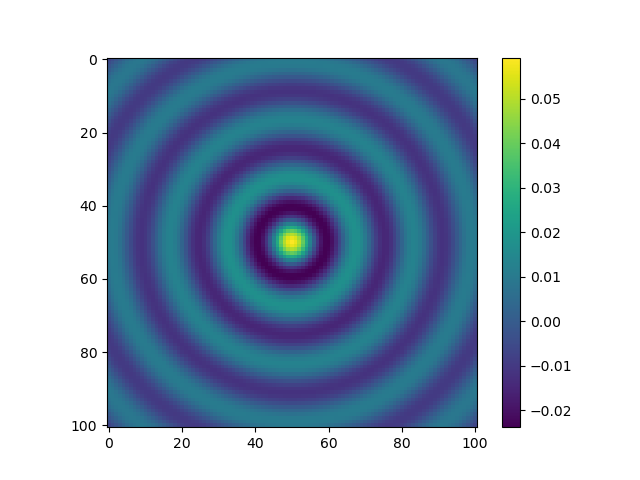

<IPython.core.display.Javascript object>


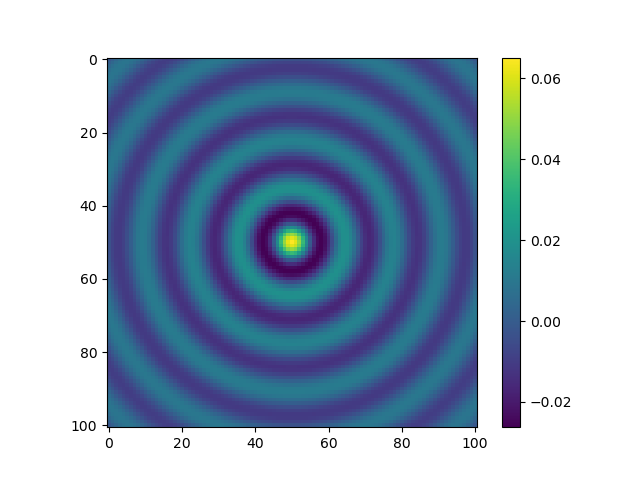

<IPython.core.display.Javascript object>


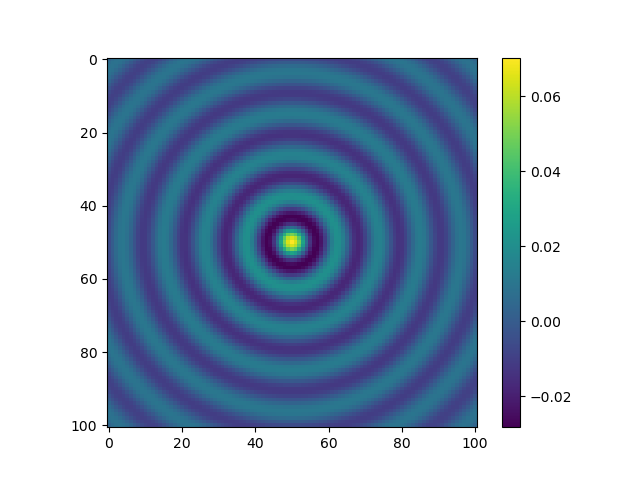

<IPython.core.display.Javascript object>


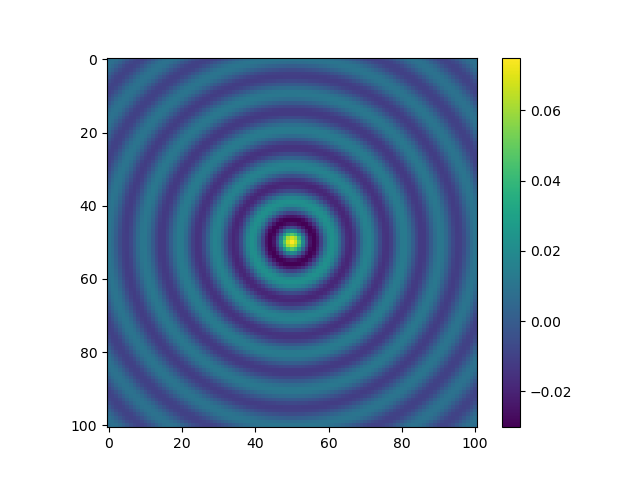

<IPython.core.display.Javascript object>


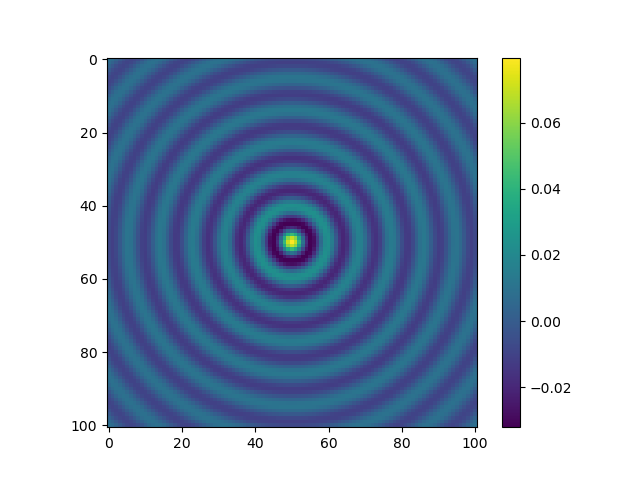

<IPython.core.display.Javascript object>


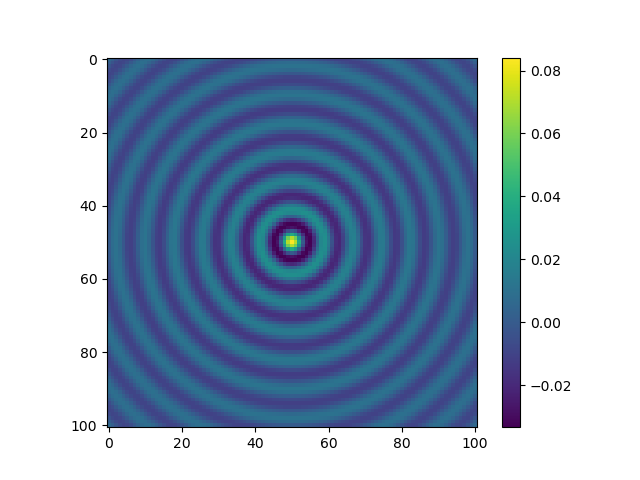

In [25]:
#take a look at the tip eigenfunctions we're using...
x0,y0=.5,.5
basis=Jmaker.GetTipEigenbasis(x0,y0)
plt.figure()
plt.imshow(np.sum(basis,axis=0));plt.colorbar()

for i in range(len(basis)):
    plt.figure()
    plt.imshow(basis[i])
    plt.colorbar()

In [13]:
%%time
d=TestScatteringBasisChange(E=44*np.exp(1j*2*np.pi*5e-2),N_sample_eigenbasis=100,N_tip_eigenbasis=5)
plt.figure()
plt.imshow(np.abs(d['P'])); plt.title('P');plt.colorbar()
plt.figure()
plt.imshow(np.abs(d['R'])); plt.title('R');plt.colorbar()

Setting Energy
Use Eigvals Len: 100
Setting Sigma
Setting Kernel


KeyboardInterrupt: 

In [ ]:
d=TestScatteringBasisChange(E=2000*np.exp(1j*2*np.pi*3e-2),N_sample_eigenbasis=100,N_tip_eigenbasis=1)
plt.figure()
plt.imshow(np.abs(d['P'])); plt.title('P');plt.colorbar()
plt.figure()
plt.imshow(np.abs(d['R'])); plt.title('R');plt.colorbar()

In [ ]:
%%time
d=TestScatteringBasisChange(E=2000*np.exp(1j*2*np.pi*3e-2),N_sample_eigenbasis=300,N_tip_eigenbasis=1)
plt.figure()
plt.imshow(np.abs(d['P'])); plt.title('P');plt.colorbar()
plt.figure()
plt.imshow(np.abs(d['R'])); plt.title('R');plt.colorbar()

In [ ]:
q=20
E=2000*np.exp(1j*2*np.pi*5e-2)
N=10
Responder=AES.SampleResponse(eigpairs,E=E,N=N)
xs,ys=Responder.xs,Responder.ys
Jmaker=AES.BesselGenerator(q,xs=xs,ys=ys)

In [ ]:
tip_eigenbasis=Jmaker.GetTipEigenbasis(x0=0,y0=0)
R_alphabeta = Responder.GetRAlphaBeta(tip_eigenbasis)
plt.matshow(abs(R_alphabeta)); colorbar()

In [ ]:
from common import numerics as num
qs=[]; eigvals=[]
for eigval,eigfunc in zip(Responder.use_eigvals,\
                          Responder.use_eigfuncs):
    s=num.Spectrum(num.Spectrum(eigfunc,axis=0),axis=1).folded
    fx,fy=s.locate(s.max())[0]
    q=2*pi*np.sqrt(fx**2+fy**2)
    qs.append(q); eigvals.append(eigval)

plt.figure()
plt.plot(qs,np.sqrt(eigvals),marker='o')
plt.figure();
eigfunc.plot()


In [ ]:
xs=Jmaker.xs2
print(xs.min(),xs.max())

In [ ]:
tip_eigenbasis=Jmaker.GetTipEigenbasis(x0=0.5,y0=0.5)
R_alphabeta = Responder.GetRAlphaBeta(tip_eigenbasis)
plt.matshow(abs(R_alphabeta)); colorbar()

In [ ]:
basis=Jmaker.GetTipEigenbasis(0,0)
print(basis[0].shape,Jmaker.shape)
plt.figure();plt.imshow(basis[0]);colorbar()
plt.figure();plt.imshow(basis[1])

In [ ]:
plt.figure()
plt.matshow(np.abs(Responder.V_nm));colorbar()
plt.figure()
plt.matshow(np.abs(Responder.D));colorbar()